In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [2]:
# Importing unnormalized data from pre-processing
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_CHD")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_CHD")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_CHD")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_CHD")
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,37119005710,8.912780,45.768431,0.504943,38.792567,0.537248,55.581495,0.020107,0.097674,0.097563,0.717841,0.000000
1,1097000902,9.035270,37.165639,0.926416,41.978238,0.691502,611.406691,0.876939,0.031092,1.278073,2.085127,0.000122
2,1003011000,8.335965,37.130640,0.217070,35.334260,0.505856,48.642029,0.073701,0.023826,0.120130,0.109475,0.000455
3,32009950100,4.916514,47.542125,0.015621,14.247417,0.179167,22.552992,0.262061,0.005182,0.010977,0.037146,0.000000
4,18163010403,9.101922,45.838566,0.377117,29.588888,0.383714,304.273407,0.349444,0.111450,0.404443,0.514557,0.124721


In [3]:
# Getting rid of extra column
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [4]:
print(y_test.shape, y_train.shape)
y_test

(18081, 2) (54242, 2)


,CensusTract,CHD_prevalence
0,34029712000,8.0
1,32003003244,5.1
2,36101961600,6.4
3,9001030100,4.3
4,32003000513,8.9
...,...,...
18076,55129950600,7.6
18077,12071040108,7.3
18078,41043030902,7.0
18079,17177000200,6.9


In [5]:
# Re-indexing
y_train.set_index("CensusTract", inplace=True)
y_test.set_index("CensusTract", inplace=True)

In [6]:
print(y_test.shape, y_train.shape)

(18081, 1) (54242, 1)


In [7]:
# Getting the y-data into correct shape for model
y_test = np.array(y_test).reshape(18081,)
y_train = np.array(y_train).reshape(54242,)

In [8]:
y_train.shape

(54242,)

In [9]:
y_test.shape

(18081,)

In [10]:
X_test.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
34029712000,7.120288,42.099327,0.725187,25.073113,0.339311,690.732339,0.523568,0.128741,0.122690,0.585795,2.479701e-03
32003003244,6.485696,56.945795,0.526954,30.883518,0.432138,306.442740,0.012357,0.004736,0.086991,2.368265,0.000000e+00
36101961600,6.100252,37.633061,0.107652,17.215058,0.196471,0.065782,0.380024,0.054795,0.080720,0.142241,1.077062e-07
9001030100,7.083005,43.887108,0.468480,28.287826,0.357967,166.907404,0.545776,0.176499,0.204629,2.076365,4.558037e-04
32003000513,7.583310,54.818535,0.705141,39.339748,0.580993,264.176247,0.041604,0.004489,0.625612,3.872043,6.509710e-05


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random Forest Regressor

In [11]:
# Instantiating RandomForestRegressor with default hyperparameters
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
y_pred = rf.predict(X_test)

In [13]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5098806505521729
MAE: 0.9732864885791714
MSE: 1.9173265181682426
RMSE: 1.3846756003368597


### This R<sup>2</sup> score is mediocre. 

### Now with tuned hyperparameters via randomized search.

In [1]:
# Instantiating RandomForestRegressor and randomly searching for best hyperparameters n_estimators and max_depth
params = {"n_estimators":range(1,500), "max_depth":range(1,30)}
rf = RandomForestRegressor() 
rs = RandomizedSearchCV(rf, params)

NameError: name 'RandomForestRegressor' is not defined

In [15]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [16]:
rs.best_estimator_

RandomForestRegressor(max_depth=27, n_estimators=350)

In [17]:
y_pred = rs.predict(X_test)

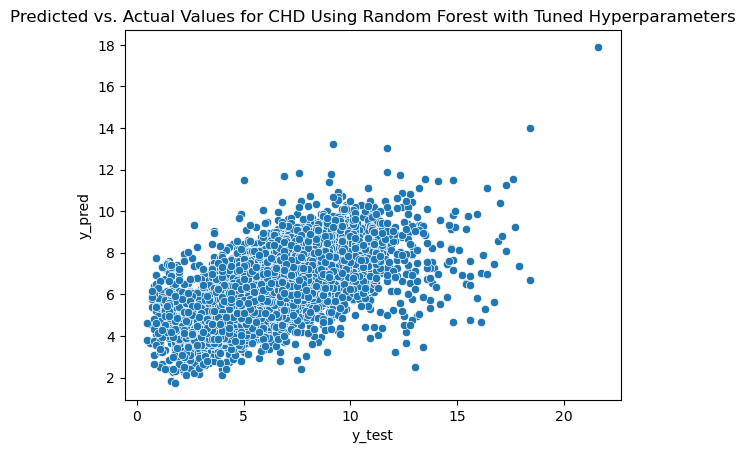

In [18]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for CHD Using Random Forest with Tuned Hyperparameters")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [19]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5130865928177504
MAE: 0.9703924439411592
MSE: 1.9047850053133977
RMSE: 1.3801394876292026


### These metrics show that this is a mediocre model.

### AdaBoost Regressor

In [20]:
# Instantiating AdaBoostRegressor with default parameters
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [21]:
y_pred = ada.predict(X_test)

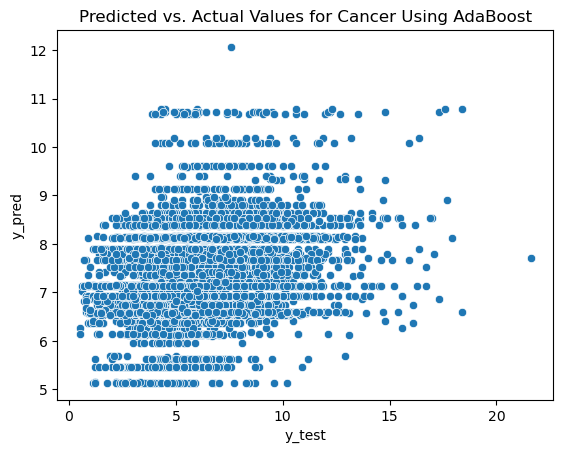

In [22]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [23]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.19069262972741607
MAE: 1.7205780146375478
MSE: 4.657940064059588
RMSE: 2.15822613830423


### With a negative R<sup>2</sup> value, this is a horrible model.

### Now with tuned hyperparameters via randomized search.

In [24]:
# Instantiating AdaBoost Regressor and using randomized searching for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {"n_estimators":range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [25]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [26]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=18.000999999999998, n_estimators=249)

In [27]:
y_pred = rs.predict(X_test)

In [28]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -204.70721354195365
MAE: 28.298517781096177
MSE: 804.7180670316908
RMSE: 28.367553067398866


### The hyperparameter tuning just made the results worse. 

### Gradient Boost Regressor

In [29]:
# Instantiating GradientBoostRegressor with default parameters
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [30]:
y_pred = gb.predict(X_test)

In [31]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3599791952818735
MAE: 1.1396253802421894
MSE: 2.5037347789838065
RMSE: 1.5823194301353334


### This is not as good as random forest.

### Now with tuned hyperparameters via randomized search.

In [32]:
# Instantiating GradientBoostRegressor and randomly search for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators":range(1, 500), "max_leaf_nodes":range(2, 100), "learning_rate":np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [33]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [34]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=42,
                          n_estimators=444)

In [35]:
y_pred = rs.predict(X_test)

In [36]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.31808870421094015
MAE: 1.1878693494801122
MSE: 2.6676086384424815
RMSE: 1.6332815551650859


### The tuning did not make much of a difference, and this is still not as good as Random Forest. 

### XGBoost Regressor

In [37]:
# Instantiating XGBRegressor with default parameters
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
y_pred = xgb.predict(X_test)

In [39]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.46596132591779427
MAE: 1.0276056593982568
MSE: 2.0891370901776996
RMSE: 1.4453847550661725


### This is still not as good as Random Forest. 

### Now with tuned hyperparameters via randomized search.

In [40]:
# Instantiating XGBRegressor Regressor and randomized search for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth":range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [41]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [42]:
rs.best_params_

{'min_child_weight': 51, 'max_depth': 85, 'gamma': 42}

In [43]:
y_pred = rs.predict(X_test)

In [44]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4645518097232644
MAE: 1.0321130525867372
MSE: 2.094651058929605
RMSE: 1.4472909379007404


### This is slightly worse than XGBoost without tuning the hyperparameters.

### LightGBM Regressor

In [45]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_lambda
lgbm = ltb.LGBMRegressor()
params = {"reg_alpha":np.arange(1e-3,100), "reg_lambda":np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [46]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [47]:
rs.best_estimator_

LGBMRegressor(reg_alpha=6.0009999999999994, reg_lambda=50.00099999999999)

In [48]:
y_pred = rs.predict(X_test)

In [49]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.44585423089565823
MAE: 1.0453605162203508
MSE: 2.167795209945268
RMSE: 1.4723434415737615


### This is not as good as random forest

### Support vector machine requires normalized data.

In [50]:
# Importing normalized data
X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,37119005710,8.912780,45.768431,0.388568,0.821299,0.752917,-0.753897,-1.327812,0.333528,0.097563,-0.335776
1,1097000902,9.035270,37.165639,1.322447,1.095497,1.601663,0.479179,1.667931,-0.765165,1.278073,0.482143
2,1003011000,8.335965,37.130640,-0.814455,0.501502,0.560153,-0.810621,-0.977673,-0.924906,0.120130,-1.176304
3,32009950100,4.916514,47.542125,-2.264089,-2.349832,-2.014681,-1.115054,-0.010846,-1.381932,0.010977,-1.327763
4,18163010403,9.101922,45.838566,-0.060140,-0.092519,-0.268074,0.076039,0.334889,0.497366,0.404443,-0.554687


In [51]:
# Getting rid of extra column
X_train_log.set_index("CensusTract")
X_test_log.set_index("CensusTract")
print(X_train_log.shape, X_test_log.shape)

(54242, 11) (18081, 11)


In [52]:
print(y_train_log.shape, y_test_log.shape)
print(y_train_log.head())

(54242, 2) (18081, 2)
   Unnamed: 0         0
0           0 -0.555440
1           1 -0.177749
2           2  1.158829
3           3  2.302863
4           4 -1.137089


In [53]:
# Getting rid of extra column
y_train_log.drop("Unnamed: 0", axis=1, inplace=True)
y_test_log.drop("Unnamed: 0", axis=1, inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [54]:
# Putting y into correct shape for model
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train_log.shape, y_test_log.shape)

(54242,) (18081,)


### Support Vector Machine Regressor with tuned parameters via randomized search

In [55]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.

svm = SVR()
params = {"C":np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [56]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [57]:
svm_rs.best_estimator_

SVR(C=5.01, epsilon=0.0001)

In [58]:
y_pred_log = svm_rs.predict(X_test_log)

In [59]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.44585423089565823
MAE: 1.0453605162203508
MSE: 2.167795209945268
RMSE: 1.4723434415737615


### This model is still not as good as random forest.

## Random forest with hyperparameters from randomized search gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.